# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [ ]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile('cifar-10-python.tar.gz'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            'cifar-10-python.tar.gz',
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open('cifar-10-python.tar.gz') as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 4
sample_id = 25
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

In [ ]:
features, labels = helper.load_cfar10_batch(cifar10_dataset_folder_path, batch_id)

In [ ]:
def summary(x):
    return "min=%.4f 25%%=%.4f mean=%.4f median=%.4f 75%%=%.4f max=%.4f" % \
    (np.min(x), np.percentile(x,0.25), np.mean(x), np.median(x), np.percentile(x,0.75), np.max(x))

In [ ]:
print(type(features),type(labels))
print(features.dtype,features.shape)

print("feature:", summary(features))
print("  label:", summary(labels))

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [ ]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    return x/255


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [ ]:
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    y = np.zeros((len(x),10), dtype=np.int)
    y[range(len(x)),x] = 1
    return y


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [ ]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

If you're finding it hard to dedicate enough time for this course a week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) to build each layer, except "Convolutional & Max Pooling" layer.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

If you would like to get the most of this course, try to solve all the problems without TF Layers.  Let's begin!
### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [2]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a bach of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    s = [None] + list(image_shape)
    return tf.placeholder(tf.float32, shape=tuple(s), name='x')


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, shape=(None,n_classes), name='y')


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, name='keep_prob')


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

Note: You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for this layer.  You're free to use any TensorFlow package for all the other layers.

In [3]:
from functools import reduce
import math

def reduceProd(x):
    return reduce(lambda a,b:a*b,x)

def getTensorSize(x):
    return reduceProd(x.get_shape().as_list()[1:])

def xavier_init(shape, n_inputs, n_outputs, uniform=True):
  """Set the parameter initialization using the method described.
  This method is designed to keep the scale of the gradients roughly the same
  in all layers.
  Xavier Glorot and Yoshua Bengio (2010):
           Understanding the difficulty of training deep feedforward neural
           networks. International conference on artificial intelligence and
           statistics.
  Args:
    n_inputs: The number of input nodes into each output.
    n_outputs: The number of output nodes for each input.
    uniform: If true use a uniform distribution, otherwise use a normal.
  Returns:
    An initializer.
  """
  if uniform:
    # 6 was used in the paper.
    init_range = math.sqrt(6.0 / (n_inputs + n_outputs))
    return tf.random_uniform(shape=shape, minval=-init_range, maxval=init_range)
  else:
    # 3 gives us approximately the same limits as above since this repicks
    # values greater than 2 standard deviations from the mean.
    stddev = math.sqrt(3.0 / (n_inputs + n_outputs))
    return tf.truncated_normal(shape=shape, stddev=stddev)

In [4]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides, keep_prob=None, dropout=False, relu=True):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    # ---- convolution layer ----
    print("Add conv2d_maxpool: ReLU[%d] dropout[%d] conv kernel[%dx%d] stride[%dx%d] pool kernal[%dx%d] stride[%dx%d] output[%d]" % \
           (relu, dropout, \
            conv_ksize[0],conv_ksize[1],conv_strides[0],conv_strides[1],\
            pool_ksize[0], pool_ksize[1],pool_strides[0], pool_strides[1],conv_num_outputs))
    conv_input_size = getTensorSize(x_tensor)
    conv_output_size = (x_tensor.get_shape().as_list()[1] / conv_strides[0]) ** 2 * conv_num_outputs
    print("  conv2d_maxpool input: ",x_tensor.get_shape().as_list(),"\tsize =",conv_input_size)
    n_channels = x_tensor.get_shape().as_list()[3]
    
    shape_W = [conv_ksize[0],conv_ksize[1],n_channels,conv_num_outputs]
    shape_b = [conv_num_outputs]
    # F_W = tf.Variable(tf.random_normal(shape_W))
    # F_b = tf.Variable(tf.random_normal(shape_b))
    
    F_W = tf.Variable(xavier_init(shape_W, conv_input_size, conv_output_size))
    F_b = tf.Variable(xavier_init(shape_b, conv_input_size, conv_output_size))
    #F_W = tf.get_variable(shape=shape_W, initializer=tf.contrib.layers.xavier_initializer())
    #F_b = tf.get_variable(shape=shape_b, initializer=tf.contrib.layers.xavier_initializer())
    
    x_tensor = tf.nn.conv2d(x_tensor, F_W, [1,conv_strides[0],conv_strides[1],1], 'SAME') + F_b
    if relu:
        x_tensor = tf.nn.relu(x_tensor)
    print("  conv2d_maxpool cov2d: ",x_tensor.get_shape().as_list(),"\tsize =",getTensorSize(x_tensor))
    if dropout:
        print("  conv2d_maxpool add dropout")
        x_tensor = tf.nn.dropout(x_tensor, keep_prob)
    
    # ---- max pooling layer ----
    x_tensor = tf.nn.max_pool(x_tensor, ksize=[1, pool_ksize[0], pool_ksize[1], 1],\
                              strides=[1, pool_strides[0], pool_strides[1], 1], padding='SAME')
    print("  conv2d_maxpool  pool: ",x_tensor.get_shape().as_list(),"\tsize =",getTensorSize(x_tensor))
    return x_tensor 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Add conv2d_maxpool: ReLU[1] dropout[0] conv kernel[2x2] stride[4x4] pool kernal[2x2] stride[2x2] output[10]
  conv2d_maxpool input:  [None, 32, 32, 5] 	size = 5120
  conv2d_maxpool cov2d:  [None, 8, 8, 10] 	size = 640
  conv2d_maxpool  pool:  [None, 4, 4, 10] 	size = 160
Tests Passed


In [ ]:
#### conv_net(x, keep_prob, conv_plan=3, conv_depth=3, full_plan=3)
conv_net(x, keep_prob, conv_plan=3, conv_depth=2, full_plan=4, dropout_fc=True, dropout_conv=True, relu=True)

### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). You can use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for this layer.

In [5]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    flat_size = getTensorSize(x_tensor)
    print("Add flatten: size[%d]" % (flat_size))
    return tf.reshape(x_tensor, [-1, flat_size])


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Add flatten: size[1800]
Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). You can use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for this layer.

In [6]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    input_size = x_tensor.get_shape().as_list()[1]
    print("Add fully_conn: input[%d] output[%d]" % (input_size,num_outputs))
    
    # F_W = tf.Variable(tf.random_normal([input_size, num_outputs]))
    # F_b = tf.Variable(tf.random_normal([num_outputs]))
    
    shape_W = [input_size, num_outputs]
    shape_b = [num_outputs]
    F_W = tf.Variable(xavier_init(shape_W, input_size, num_outputs))
    F_b = tf.Variable(xavier_init(shape_b, input_size, num_outputs))
    
    x_tensor = tf.add(tf.matmul(x_tensor, F_W), F_b)
    x_tensor = tf.nn.relu(x_tensor)
    return x_tensor


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Add fully_conn: input[128] output[40]
Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). You can use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for this layer.

Note: Activation, softmax, or cross entropy shouldn't be applied to this.

In [7]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    input_size = x_tensor.get_shape().as_list()[1]
    print("Add output: input[%d] output[%d]" % (input_size,num_outputs))
    F_W = tf.Variable(tf.random_normal([input_size, num_outputs]))
    F_b = tf.Variable(tf.random_normal([num_outputs]))
    x_tensor = tf.add(tf.matmul(x_tensor, F_W), F_b)
    return x_tensor


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Add output: input[128] output[40]
Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [31]:
import pandas as pd
import feather
import itertools
def expandgrid(*itrs):
   product = list(itertools.product(*itrs))
   return pd.DataFrame({'Var{}'.format(i+1):[x[i] for x in product] for i in range(len(itrs))})

# Define conv-max-pool layer parameters
convParams1 = pd.DataFrame({
    'layer':range(4),
    'conv_kernal':[5]*4,
    'conv_stride':[1]*4,
    'pool_kernal':[2]*4,
    'pool_stride':[2]*4,
    'num_output':[16*(2**number) for number in range(0,4)]
})

convParams2 = pd.DataFrame({
    'layer':range(4),
    'conv_kernal':[5]*4,
    'conv_stride':[1]*4,
    'pool_kernal':[2]*4,
    'pool_stride':[2]*4,
    'num_output':[32*(2**number) for number in range(0,4)]
})

convParams3 = pd.DataFrame({
    'layer':range(4),
    'conv_kernal':[4]*4,
    'conv_stride':[2]*4,
    'pool_kernal':[2]*4,
    'pool_stride':[2]*4,
    'num_output':[32*(4**number) for number in range(0,4)]
})

convParamsList = [convParams1,convParams2,convParams3]

fullParams = [[1024],[512],[512, 128], [1024, 128],[1024, 256, 64]]


In [32]:
# conv_net(x, keep_prob, conv_plan=3, conv_depth=2, full_plan=4, dropout=True, relu=True)
#conv_net(x, keep_prob, conv_plan=2, conv_depth=4, full_plan=4, dropout_fc=True, dropout_conv=True, relu=True)
conv_net(x, keep_prob, conv_plan=3, conv_depth=3, full_plan=5, dropout_fc=True, dropout_conv=True, relu=True)

Build conv_net conv_plan[3] conv_depth[3] full_plan[5]
Add conv2d_maxpool: ReLU[1] dropout[1] conv kernel[4x4] stride[2x2] pool kernal[2x2] stride[2x2] output[32]
  conv2d_maxpool input:  [None, 32, 32, 3] 	size = 3072
  conv2d_maxpool cov2d:  [None, 16, 16, 32] 	size = 8192
  conv2d_maxpool add dropout
  conv2d_maxpool  pool:  [None, 8, 8, 32] 	size = 2048
Add conv2d_maxpool: ReLU[1] dropout[1] conv kernel[4x4] stride[2x2] pool kernal[2x2] stride[2x2] output[128]
  conv2d_maxpool input:  [None, 8, 8, 32] 	size = 2048
  conv2d_maxpool cov2d:  [None, 4, 4, 128] 	size = 2048
  conv2d_maxpool add dropout
  conv2d_maxpool  pool:  [None, 2, 2, 128] 	size = 512
Add conv2d_maxpool: ReLU[1] dropout[1] conv kernel[4x4] stride[2x2] pool kernal[2x2] stride[2x2] output[512]
  conv2d_maxpool input:  [None, 2, 2, 128] 	size = 512
  conv2d_maxpool cov2d:  [None, 1, 1, 512] 	size = 512
  conv2d_maxpool add dropout
  conv2d_maxpool  pool:  [None, 1, 1, 512] 	size = 512
Add flatten: size[512]
Add fully_

<tf.Tensor 'Add_24:0' shape=(?, 10) dtype=float32>

In [34]:
def conv_net(x, keep_prob, conv_plan=1, conv_depth=1, full_plan=1, dropout_fc=True, dropout_conv=False, relu=True):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    print("Build conv_net conv_plan[%d] conv_depth[%d] full_plan[%d]" % (conv_plan,conv_depth,full_plan))
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    convParams = convParamsList[conv_plan-1]
    for i in range(conv_depth):
        # def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides, keep_prob=None, dropout=False, relu=True):
        conv_num_outputs = convParams.at[i,'num_output']
        conv_ksize = [convParams.at[i,'conv_kernal'],convParams.at[i,'conv_kernal']]
        conv_strides = [convParams.at[i,'conv_stride'],convParams.at[i,'conv_stride']]
        pool_ksize = [convParams.at[i,'pool_kernal'],convParams.at[i,'pool_kernal']]
        pool_strides = [convParams.at[i,'pool_stride'],convParams.at[i,'pool_stride']]
        x = conv2d_maxpool(x, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides, keep_prob, dropout_conv, relu)

    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    x = flatten(x)

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    full_params = fullParams[full_plan-1]
    if dropout_fc:
        x = fully_conn(x, full_params[0])
        x = tf.nn.dropout(x, keep_prob)
        print("Add dropout layer")
        for i in range(1,len(full_params)):
            x = fully_conn(x, full_params[i])
    else:
        for i in range(len(full_params)):
             x = fully_conn(x, full_params[i])
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    n_classes = 10
    x = output(x, n_classes)
    
    # TODO: return output
    print("")
    return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
# logits = conv_net(x, keep_prob, conv_plan=2, conv_depth=4, full_plan=4, dropout_fc=True, dropout_conv=False, relu=True)
# logits = conv_net(x, keep_prob, conv_plan=3, conv_depth=2, full_plan=4, dropout_fc=True, dropout_conv=True, relu=True)
# logits = conv_net(x, keep_prob, conv_plan=2, conv_depth=3, full_plan=4, dropout_fc=True, dropout_conv=False, relu=False)
logits = conv_net(x, keep_prob, conv_plan=3, conv_depth=3, full_plan=5, dropout_fc=True, dropout_conv=True, relu=True)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Build conv_net conv_plan[3] conv_depth[3] full_plan[5]
Add conv2d_maxpool: ReLU[1] dropout[1] conv kernel[4x4] stride[2x2] pool kernal[2x2] stride[2x2] output[32]
  conv2d_maxpool input:  [None, 32, 32, 3] 	size = 3072
  conv2d_maxpool cov2d:  [None, 16, 16, 32] 	size = 8192
  conv2d_maxpool add dropout
  conv2d_maxpool  pool:  [None, 8, 8, 32] 	size = 2048
Add conv2d_maxpool: ReLU[1] dropout[1] conv kernel[4x4] stride[2x2] pool kernal[2x2] stride[2x2] output[128]
  conv2d_maxpool input:  [None, 8, 8, 32] 	size = 2048
  conv2d_maxpool cov2d:  [None, 4, 4, 128] 	size = 2048
  conv2d_maxpool add dropout
  conv2d_maxpool  pool:  [None, 2, 2, 128] 	size = 512
Add conv2d_maxpool: ReLU[1] dropout[1] conv kernel[4x4] stride[2x2] pool kernal[2x2] stride[2x2] output[512]
  conv2d_maxpool input:  [None, 2, 2, 128] 	size = 512
  conv2d_maxpool cov2d:  [None, 1, 1, 512] 	size = 512
  conv2d_maxpool add dropout
  conv2d_maxpool  pool:  [None, 1, 1, 512] 	size = 512
Add flatten: size[512]
Add fully_

## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [14]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    session.run(optimizer, feed_dict={'x:0': feature_batch, 'y:0': label_batch, 'keep_prob:0': keep_probability})


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [15]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    # Calculate batch loss and accuracy
    loss = session.run(cost, feed_dict={x: feature_batch, y: label_batch, keep_prob: 1.})
    valid_acc = session.run(accuracy, feed_dict={x: valid_features, y: valid_labels, keep_prob: 1.})

    print('Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(loss,valid_acc))

In [16]:
def save_stats(session, feature_batch, label_batch, cost, accuracy, batch, epoch):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    # Calculate batch loss and accuracy
    loss = session.run(cost, feed_dict={'x:0': feature_batch, 'y:0': label_batch, 'keep_prob:0': 1.})
    valid_acc = session.run(accuracy, feed_dict={'x:0': valid_features, 'y:0': valid_labels, 'keep_prob:0': 1.})

    print('Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(loss,valid_acc))
    return pd.DataFrame({'Batch':[batch],'Epoch':[epoch],'Loss':[loss],'ValidAcc':[valid_acc]})

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [42]:
# TODO: Tune Parameters
epochs = 80
batch_size = 256
keep_probability = 0.75

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [41]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print("epochs = %d" % epochs)
print("batch_size = %d" % batch_size)
print("keep_probability = %.2f" % keep_probability)
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

epochs = 100
batch_size = 256
keep_probability = 0.75
Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  Loss:     2.2722 Validation Accuracy: 0.184400
Epoch  2, CIFAR-10 Batch 1:  Loss:     2.0713 Validation Accuracy: 0.287000
Epoch  3, CIFAR-10 Batch 1:  Loss:     1.9290 Validation Accuracy: 0.302800
Epoch  4, CIFAR-10 Batch 1:  Loss:     1.8281 Validation Accuracy: 0.375800
Epoch  5, CIFAR-10 Batch 1:  Loss:     1.6513 Validation Accuracy: 0.400200
Epoch  6, CIFAR-10 Batch 1:  Loss:     1.5778 Validation Accuracy: 0.416600
Epoch  7, CIFAR-10 Batch 1:  Loss:     1.5401 Validation Accuracy: 0.403800
Epoch  8, CIFAR-10 Batch 1:  Loss:     1.3957 Validation Accuracy: 0.440000
Epoch  9, CIFAR-10 Batch 1:  Loss:     1.2332 Validation Accuracy: 0.458000
Epoch 10, CIFAR-10 Batch 1:  Loss:     1.1907 Validation Accuracy: 0.474400
Epoch 11, CIFAR-10 Batch 1:  Loss:     1.0676 Validation Accuracy: 0.482200
Epoch 12, CIFAR-10 Batch 1:  Loss:     0.9841 Validation Accuracy: 

In [ ]:
# wrapper function for grid-search 
def calibrate_hyper_param_cnn(keep_probability, conv_plan, conv_depth, full_plan, batch_size, epochs=20):
    # Remove previous weights, bias, inputs, etc..
    tf.reset_default_graph()

    # Inputs
    x = neural_net_image_input((32, 32, 3))
    y = neural_net_label_input(10)
    keep_prob = neural_net_keep_prob_input()

    # Model
    logits = conv_net(x, keep_prob, conv_plan, conv_depth, full_plan)

    # Name logits Tensor, so that is can be loaded from disk after training
    logits = tf.identity(logits, name='logits')

    # Loss and Optimizer
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
    optimizer = tf.train.AdamOptimizer().minimize(cost)

    # Accuracy
    correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

    print("epochs = %d" % epochs)
    print("batch_size = %d" % batch_size)
    print("keep_probability = %.2f" % keep_probability)
    print('Checking the Training on a Single Batch...')
    acc_df = None
    with tf.Session() as sess:
        # Initializing the variables
        sess.run(tf.global_variables_initializer())

        # Training cycle
        for epoch in range(epochs):
            batch_i = 1
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            row = save_stats(sess, batch_features, batch_labels, cost, accuracy, batch_i, epoch + 1)
            if acc_df is None:
                acc_df = row
            else:
                acc_df = acc_df.append(row)
    acc_df['KeepProb'] = keep_probability
    acc_df['ConvPlan'] = conv_plan
    acc_df['ConvDepth'] = conv_depth
    acc_df['FullPlan'] = full_plan
    acc_df['BatchSize'] = batch_size
    return acc_df

In [ ]:
# build grid-search parameters
conv_plans = range(1,4)
conv_depths = range(1,5)
full_plans = range(1,6)
keep_probs = [0.5,0.75]
paramRack = expandgrid(conv_plans,conv_depths,full_plans,keep_probs)
paramRack.columns = ['conv_plan','conv_depth','full_plan','keep_prob']
len(paramRack)

In [ ]:
# print(paramRack)
output_folder = 'F:/temp/udacity/set_2/'
for i in range(1,len(paramRack)):
    conv_plan = paramRack.at[i,'conv_plan']
    conv_depth = paramRack.at[i,'conv_depth']
    full_plan = paramRack.at[i,'full_plan']
    keep_prob = paramRack.at[i,'keep_prob']
    print('%3d: conv_plan=%d conv_depth=%d full_plan=%d keep_prob=%.2f'%(i,conv_plan,conv_depth,full_plan,keep_prob))
    filename = 'experiment_%d.feather' % i
    filepath = output_folder + filename
    df = calibrate_hyper_param_cnn(keep_prob, conv_plan, conv_depth, full_plan, batch_size=1024, epochs=20)
    feather.write_dataframe(df, output_folder + filename)
    print("Write to %s\n" % filepath)

# df = calibrate_hyper_param_cnn(keep_probability=0.5, conv_plan=1, full_plan=1, batch_size=256, epochs=10)
# experiment_i = 1
# feather.write_dataframe(df, output_folder + filename)

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [44]:
# TODO: Tune Parameters
epochs = 30
batch_size = 256
keep_probability = 0.75

In [45]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  Loss:     2.1694 Validation Accuracy: 0.224800
Epoch  1, CIFAR-10 Batch 2:  Loss:     1.9625 Validation Accuracy: 0.274200
Epoch  1, CIFAR-10 Batch 3:  Loss:     1.6925 Validation Accuracy: 0.316200
Epoch  1, CIFAR-10 Batch 4:  Loss:     1.7515 Validation Accuracy: 0.337800
Epoch  1, CIFAR-10 Batch 5:  Loss:     1.7802 Validation Accuracy: 0.381600
Epoch  2, CIFAR-10 Batch 1:  Loss:     1.7528 Validation Accuracy: 0.423600
Epoch  2, CIFAR-10 Batch 2:  Loss:     1.4973 Validation Accuracy: 0.427000
Epoch  2, CIFAR-10 Batch 3:  Loss:     1.3144 Validation Accuracy: 0.424400
Epoch  2, CIFAR-10 Batch 4:  Loss:     1.3677 Validation Accuracy: 0.456400
Epoch  2, CIFAR-10 Batch 5:  Loss:     1.5066 Validation Accuracy: 0.469200
Epoch  3, CIFAR-10 Batch 1:  Loss:     1.4444 Validation Accuracy: 0.501200
Epoch  3, CIFAR-10 Batch 2:  Loss:     1.2320 Validation Accuracy: 0.462600
Epoch  3, CIFAR-10 Batch 3:  Loss:     1.0431 Validation Accuracy: 0.506400


# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

Testing Accuracy: 0.63125



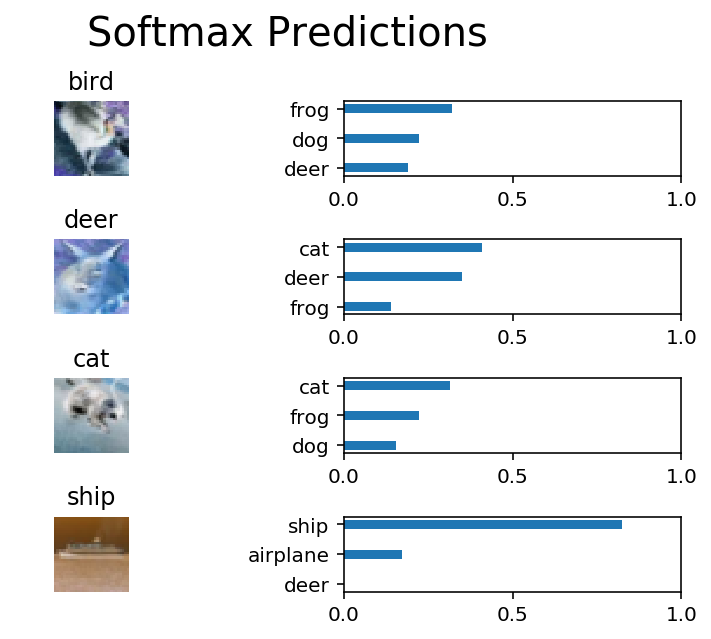

In [46]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-70% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 70%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.